In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import make_interp_spline
import numpy as np
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# Aromatic only

In [3]:
df = pd.read_csv('.../Patterson_bile_acids_normalized_per_organs.csv', sep=',')


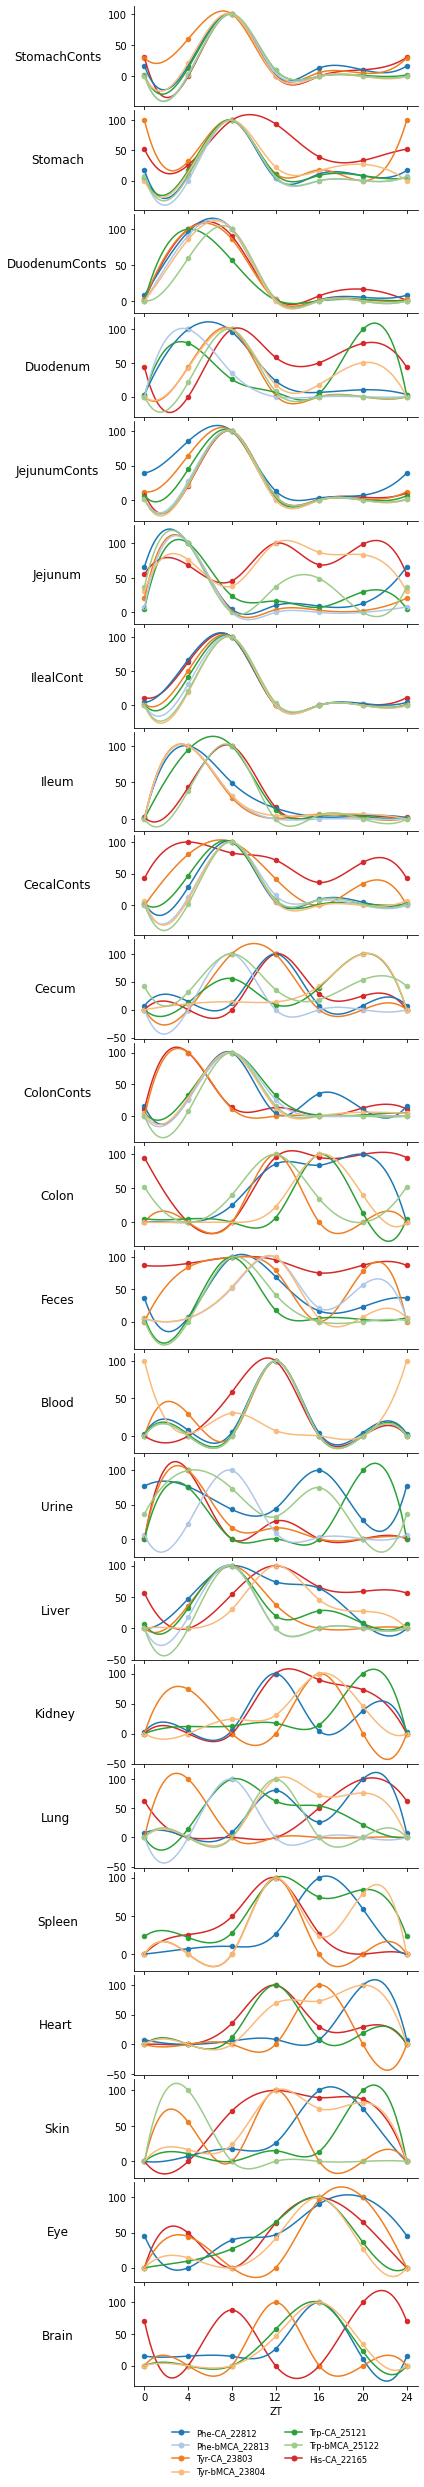

In [4]:
# Clean and ensure numeric types
df["ZT"] = pd.to_numeric(df["ZT"], errors="coerce")
df["RelAbundance"] = pd.to_numeric(df["RelAbundance"], errors="coerce")
df_clean = df.dropna(subset=["ZT", "RelAbundance"])

# Filter only aromatic amino acid conjugates
aromatic_metabolites = [
    'Phe-CA_22812', 'Tyr-CA_23803', 'Trp-CA_25121',
    'Phe-bMCA_22813', 'Tyr-bMCA_23804', 'Trp-bMCA_25122', 'His-CA_22165'
]
df_filtered = df_clean[df_clean["Metabolite"].isin(aromatic_metabolites)]
# Biologically meaningful tissue order
tissue_order = [
    "StomachConts", "Stomach",
    "DuodenumConts", "Duodenum",
    "JejunumConts", "Jejunum",
    "IlealCont", "Ileum",
    "CecalConts", "Cecum",
    "ColonConts", "Colon",
    "Feces",
    "Blood", "Urine", 'Liver',
    "Kidney", "Lung", "Spleen", "Heart",
    "Skin", "Eye", "Brain"
]
tissues = [t for t in tissue_order if t in df_filtered["TissueType"].unique()]
metabolites = df_filtered["Metabolite"].unique()

#palette
# palette = sns.color_palette("husl", n_colors=len(metabolites))

#manual one
met_color_dict = {
    'Phe-CA_22812': '#1D78B5',     
    'Tyr-CA_23803': '#F07E20',     
    'Trp-CA_25121': '#2BA037',     
    'Phe-bMCA_22813': '#AFC8E8',   
    'Tyr-bMCA_23804': '#F9BA7A',   
    'Trp-bMCA_25122': '#9DCB89',
    'His-CA_22165': '#D62828'
}

metabolites = [
    'Phe-CA_22812', 'Phe-bMCA_22813', 'Tyr-CA_23803', 'Tyr-bMCA_23804', 'Trp-CA_25121',
    'Trp-bMCA_25122', 'His-CA_22165'
]

# Create stacked subplots with shared X-axis
fig, axes = plt.subplots(len(tissues), 1, figsize=(6, 1.5 * len(tissues)), sharex=True)

if len(tissues) == 1:
    axes = [axes]  # Ensure it's always iterable

legend_elements = [
    Line2D(
        [0], [0],
        color=met_color_dict[met],
        marker='o',
        linestyle='-',
        linewidth=1.5,
        markersize=5,
        label=met
    )
    for met in metabolites
]
    
for i, (ax, tissue) in enumerate(zip(axes, tissues)):
    df_subset = df_filtered[df_filtered["TissueType"] == tissue]

    for metabolite in df_subset["Metabolite"].unique():
        df_m = df_subset[df_subset["Metabolite"] == metabolite].sort_values("ZT")
        x = df_m["ZT"].values
        y = df_m["RelAbundance"].values

        if len(x) >= 4 and len(np.unique(x)) >= 4:
            x_new = np.linspace(x.min(), x.max(), 100)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_new)

            ax.plot(x_new, y_smooth, color=met_color_dict[metabolite], linewidth=1.5, alpha=1.0)
            ax.scatter(x, y, color=met_color_dict[metabolite], s=20, alpha=1.0, marker='o')

    ax.set_ylabel(tissue, rotation=0, labelpad=50, fontsize=12, va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Hide x-axis labels for all but the bottom
    if i < len(axes) - 1:
        ax.set_xlabel("")
        ax.set_xticks([])
        ax.tick_params(labelbottom=False)

# Set common x-axis on bottom plot
axes[-1].set_xlabel("ZT")
axes[-1].set_xlim(-1, 25)
axes[-1].set_xticks([0, 4, 8, 12, 16, 20, 24])

# Place legend below the last plot
axes[-1].legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,  # or 3 depending on space
    fontsize='small',
    frameon=False
)

plt.tight_layout(h_pad=0)  # removes padding between subplots

# plt.savefig('.../aromatic_BA_conjugates.pdf')
plt.show()



# Hydrophobic

In [5]:
df = pd.read_csv('.../Patterson_bile_acids_normalized_per_organs.csv', sep=',')


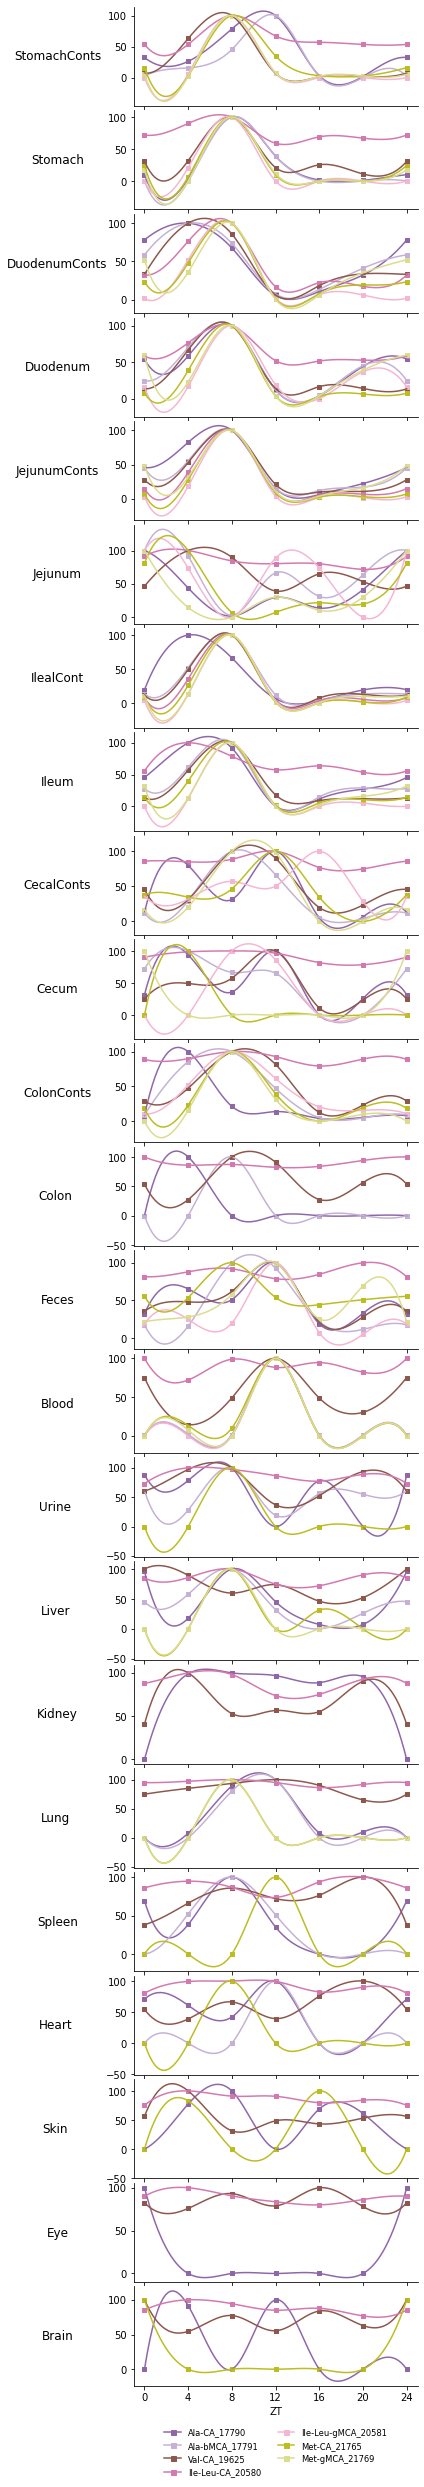

In [6]:
# Clean and ensure numeric types
df["ZT"] = pd.to_numeric(df["ZT"], errors="coerce")
df["RelAbundance"] = pd.to_numeric(df["RelAbundance"], errors="coerce")
df_clean = df.dropna(subset=["ZT", "RelAbundance"])

# Filter only aromatic amino acid conjugates
hydrophobic_metabolites = [
    'Ala-CA_17790', 'Ala-bMCA_17791', 'Val-CA_19625','Ile-Leu-CA_20580', 
    'Ile-Leu-gMCA_20581', 'Met-CA_21765', 'Met-gMCA_21769'
]
df_filtered = df_clean[df_clean["Metabolite"].isin(hydrophobic_metabolites)]
# Biologically meaningful tissue order
tissue_order = [
    "StomachConts", "Stomach",
    "DuodenumConts", "Duodenum",
    "JejunumConts", "Jejunum",
    "IlealCont", "Ileum",
    "CecalConts", "Cecum",
    "ColonConts", "Colon",
    "Feces",
    "Blood", "Urine", 'Liver',
    "Kidney", "Lung", "Spleen", "Heart",
    "Skin", "Eye", "Brain"
]
tissues = [t for t in tissue_order if t in df_filtered["TissueType"].unique()]
metabolites = df_filtered["Metabolite"].unique()

#manual one
met_color_dict = {
    'Ala-CA_17790': '#8F67A9', 
    'Ala-bMCA_17791': '#C5B1D5', 
    'Val-CA_19625': '#8D574C',
    'Ile-Leu-CA_20580': '#D379B0', 
    'Ile-Leu-gMCA_20581': '#F5B6D3', 
    'Met-CA_21765': '#BCBD20', 
    'Met-gMCA_21769': '#DBDC8E'

}

metabolites = [
    'Ala-CA_17790', 'Ala-bMCA_17791', 'Val-CA_19625', 'Ile-Leu-CA_20580', 'Ile-Leu-gMCA_20581',
    'Met-CA_21765', 'Met-gMCA_21769'
]

# Create stacked subplots with shared X-axis
fig, axes = plt.subplots(len(tissues), 1, figsize=(6, 1.5 * len(tissues)), sharex=True)

if len(tissues) == 1:
    axes = [axes]  # Ensure it's always iterable

legend_elements = [
    Line2D(
        [0], [0],
        color=met_color_dict[met],
        marker='s',
        linestyle='-',
        linewidth=1.5,
        markersize=5,
        label=met
    )
    for met in metabolites
]
    
for i, (ax, tissue) in enumerate(zip(axes, tissues)):
    df_subset = df_filtered[df_filtered["TissueType"] == tissue]

    for metabolite in df_subset["Metabolite"].unique():
        df_m = df_subset[df_subset["Metabolite"] == metabolite].sort_values("ZT")
        x = df_m["ZT"].values
        y = df_m["RelAbundance"].values

        if len(x) >= 4 and len(np.unique(x)) >= 4:
            x_new = np.linspace(x.min(), x.max(), 100)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_new)

            ax.plot(x_new, y_smooth, color=met_color_dict[metabolite], linewidth=1.5, alpha=1.0)
            ax.scatter(x, y, color=met_color_dict[metabolite], s=20, alpha=1.0, marker='s')

    ax.set_ylabel(tissue, rotation=0, labelpad=50, fontsize=12, va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Hide x-axis labels for all but the bottom
    if i < len(axes) - 1:
        ax.set_xlabel("")
        ax.set_xticks([])
        ax.tick_params(labelbottom=False)

# Set common x-axis on bottom plot
axes[-1].set_xlabel("ZT")
axes[-1].set_xlim(-1, 25)
axes[-1].set_xticks([0, 4, 8, 12, 16, 20, 24])

# Place legend below the last plot
axes[-1].legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,  # or 3 depending on space
    fontsize='small',
    frameon=False
)

plt.tight_layout(h_pad=0)  # removes padding between subplots

# plt.savefig('.../hydrophobic_BA_conjugates.pdf')
plt.show()



# Hydrophilic

In [7]:
df = pd.read_csv('.../Patterson_bile_acids_normalized_per_organs.csv', sep=',')


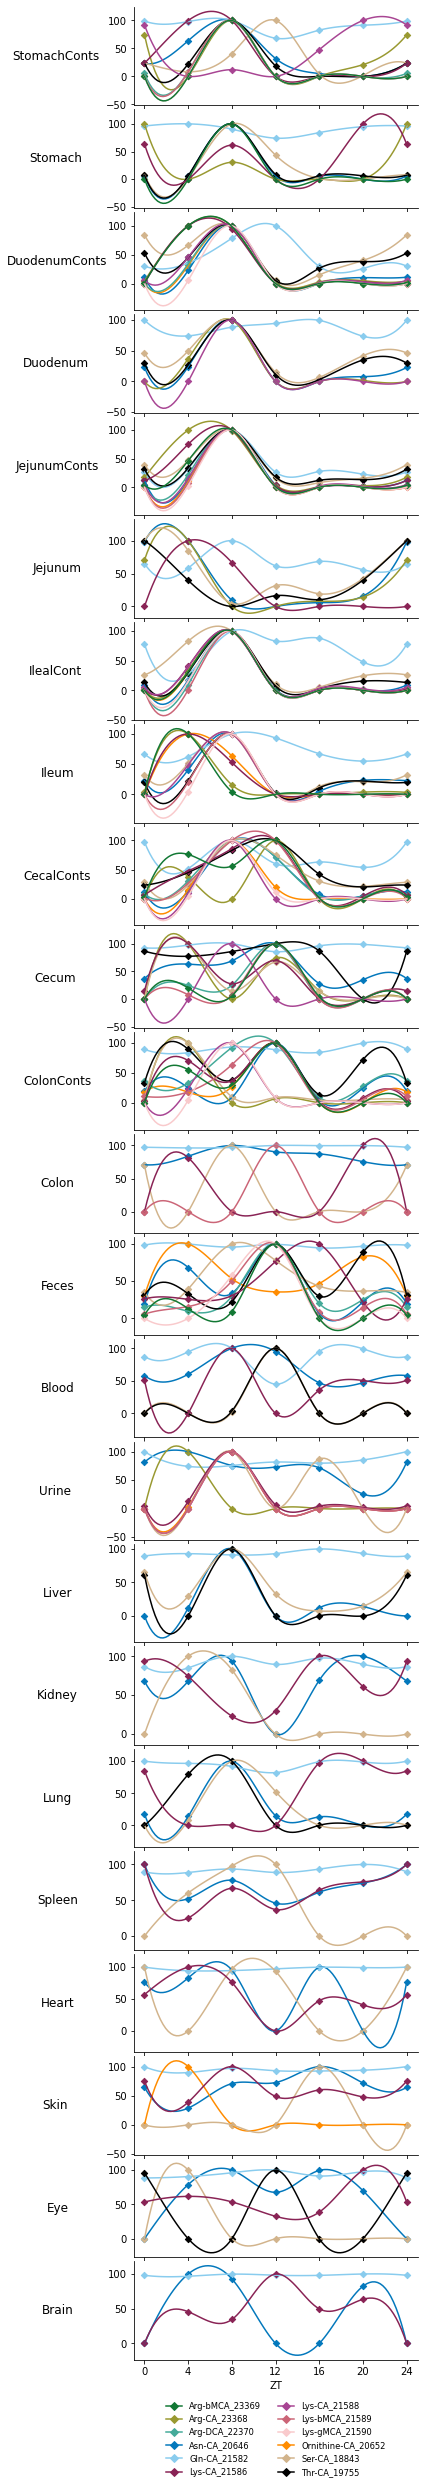

In [8]:
# Clean and ensure numeric types
df["ZT"] = pd.to_numeric(df["ZT"], errors="coerce")
df["RelAbundance"] = pd.to_numeric(df["RelAbundance"], errors="coerce")
df_clean = df.dropna(subset=["ZT", "RelAbundance"])

# Filter only aromatic amino acid conjugates
hydrophilic_metabolites = ['Arg-bMCA_23369','Arg-CA_23368', 'Arg-DCA_22370', 'Asn-CA_20646',
                           'Gln-CA_21582','Lys-CA_21586','Lys-CA_21588','Lys-bMCA_21589', 'Lys-gMCA_21590',
                           'Ornithine-CA_20652', 'Ser-CA_18843', 'Thr-CA_19755'  
                          ]

df_filtered = df_clean[df_clean["Metabolite"].isin(hydrophilic_metabolites)]
# Biologically meaningful tissue order
tissue_order = [
    "StomachConts", "Stomach",
    "DuodenumConts", "Duodenum",
    "JejunumConts", "Jejunum",
    "IlealCont", "Ileum",
    "CecalConts", "Cecum",
    "ColonConts", "Colon",
    "Feces",
    "Blood", "Urine", 'Liver',
    "Kidney", "Lung", "Spleen", "Heart",
    "Skin", "Eye", "Brain"
]
tissues = [t for t in tissue_order if t in df_filtered["TissueType"].unique()]
metabolites = df_filtered["Metabolite"].unique()

#palette
# palette = sns.color_palette("husl", n_colors=len(metabolites))

#manual one
met_color_dict = {
    'Arg-bMCA_23369': '#127834',
    'Arg-CA_23368': '#999931', 
    'Arg-DCA_22370': '#44AA99', 
    'Asn-CA_20646': '#0378BC',
    'Gln-CA_21582': '#89CCEE',
    'Lys-CA_21586': '#892355',
    'Lys-CA_21588': '#A84593',
    'Lys-bMCA_21589': '#CB6577', 
    'Lys-gMCA_21590': '#F9CACC',    
    'Ornithine-CA_20652': 'darkorange',
    'Ser-CA_18843': 'tan', 
    'Thr-CA_19755': 'black'

}

metabolites = ['Arg-bMCA_23369','Arg-CA_23368', 'Arg-DCA_22370', 'Asn-CA_20646',
               'Gln-CA_21582','Lys-CA_21586','Lys-CA_21588','Lys-bMCA_21589', 'Lys-gMCA_21590',
               'Ornithine-CA_20652', 'Ser-CA_18843', 'Thr-CA_19755' 
]

# Create stacked subplots with shared X-axis
fig, axes = plt.subplots(len(tissues), 1, figsize=(6, 1.5 * len(tissues)), sharex=True)

if len(tissues) == 1:
    axes = [axes]  # Ensure it's always iterable

legend_elements = [
    Line2D(
        [0], [0],
        color=met_color_dict[met],
        marker='D',
        linestyle='-',
        linewidth=1.5,
        markersize=5,
        label=met
    )
    for met in metabolites
]

    
for i, (ax, tissue) in enumerate(zip(axes, tissues)):
    df_subset = df_filtered[df_filtered["TissueType"] == tissue]

    for metabolite in df_subset["Metabolite"].unique():
        df_m = df_subset[df_subset["Metabolite"] == metabolite].sort_values("ZT")
        x = df_m["ZT"].values
        y = df_m["RelAbundance"].values

        if len(x) >= 4 and len(np.unique(x)) >= 4:
            x_new = np.linspace(x.min(), x.max(), 100)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_new)

            ax.plot(x_new, y_smooth, color=met_color_dict[metabolite], linewidth=1.5, alpha=1.0)
            ax.scatter(x, y, color=met_color_dict[metabolite], s=20, alpha=1.0, marker='D')

    ax.set_ylabel(tissue, rotation=0, labelpad=50, fontsize=12, va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
#     ax.grid(True, linestyle="--", alpha=0.3)

    # Hide x-axis labels for all but the bottom
    if i < len(axes) - 1:
        ax.set_xlabel("")
        ax.set_xticks([])
        ax.tick_params(labelbottom=False)

# Set common x-axis on bottom plot
axes[-1].set_xlabel("ZT")
axes[-1].set_xlim(-1, 25)
axes[-1].set_xticks([0, 4, 8, 12, 16, 20, 24])

# Place legend below the last plot
axes[-1].legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.35),
    ncol=2,  # or 3 depending on space
    fontsize='small',
    frameon=False
)

legend_elements = [
    Line2D(
        [0], [0],
        color=met_color_dict[met],
        marker='D', linestyle='None',
        markersize=6,
        label=met
    )
    for met in metabolites
]

plt.tight_layout(h_pad=0)  # removes padding between subplots

# plt.savefig('.../hydrophylic_BA_conjugates.pdf')
plt.show()

